## 1. Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


import joblib
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score, GridSearchCV


from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score, precision_score, accuracy_score, roc_auc_score, recall_score, roc_curve
from sklearn.metrics import make_scorer, confusion_matrix, classification_report   # Differnt metrics to evaluate the model


import warnings    # To avoid warning messages in the code run
warnings.filterwarnings('ignore')

### 2. Importing Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Semester 5/Dataset/HepatitisCdata.csv')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


* The entire dataset contains <b>615</b> rows and <b>14</b> columns.

In [ ]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [ ]:
df.describe(include = np.object)

,Category,Sex
count,615,615
unique,5,2
top,0=Blood Donor,m
freq,533,377


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [ ]:
df.shape

(615, 14)

* Menghapus kolom unnamed karena hanya id variabel

In [ ]:
df = df.drop('Unnamed: 0', axis = 1)

* Kita  mengkategorikan ulang kategori variabel <b>Category</b> untuk identifikasi yang lebih mudah

In [ ]:
df['Category'].loc[df['Category'].isin(['0=Blood Donor', '0s=suspect Blood Donor'])] = 0
df['Category'].loc[df['Category'].isin(['1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'])] = 1

* Membuat kolom kategori dari object menjadi int

In [ ]:
df['Category'] = df['Category'].astype(int)

*  melakukan Analisis Univariat dengan menganalisis data terkait Variabel Target

In [ ]:
Target = 'Category'
pd.crosstab(df[Target], columns = 'Normalized', normalize = True)

col_0,Normalized
Category,
0,0.878049
1,0.121951


* sekitar 88% dari entri memiliki nilai Category '0', sementara sekitar 12% memiliki nilai Category '1'.

* Mengecek Null

In [ ]:
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

* Mengecek data unique

In [ ]:
print("Unique values Category count: ", df['Category'].nunique())
print("Category values: ", df['Category'].unique())
pd.value_counts(df['Category'])

Unique values Category count:  2
Category values:  [0 1]


0    540
1     75
Name: Category, dtype: int64

* Mengkategorikan variabel-variabel yang ada dalam dataframe ke dalam variabel numerik dan variabel kategorikal.

In [ ]:
num_cols = df.select_dtypes(include = [np.number]).columns.tolist()
obj_cols = df.select_dtypes(exclude = [np.number]).columns.tolist()

* Mendapatkan daftar nama kolom-kolom numerik dalam dataframe df, kecuali kolom 'Category'. Daftar tersebut disimpan dalam variabel num_cols.

In [ ]:
num_cols = df.drop(['Category'], axis = 1).select_dtypes(include = [np.number]).columns.tolist()

In [ ]:
print('Numeric Columns \n', num_cols)
print('Non-Numeric Columns \n', obj_cols)

Numeric Columns 
 ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
Non-Numeric Columns 
 ['Sex']


In [ ]:
df = df.dropna(axis = 0)
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


* Label encode kolom 'Sex'

In [ ]:
encoding_list = ['Sex']

label_encoding_list = []
one_hot_encoding_list = []

for i in range (0, len(encoding_list)):
    if(len(df[f'{encoding_list[i]}'].unique()) == 2):
        label_encoding_list.append(encoding_list[i])
    else:
        one_hot_encoding_list.append(encoding_list[i])

    print(f'Unique Values for {encoding_list[i]}', df[f'{encoding_list[i]}'].unique())

Unique Values for Sex ['m' 'f']


* Membuat Dummy Variabel

In [ ]:
# Numerical columns data
df_num = df[num_cols + ['Category']]

# Categorical columns data
df_cat = df[obj_cols]

# Creating dummies
df_cat_dummies = pd.get_dummies(df_cat)
print(df_cat_dummies.shape)
df_cat_dummies.head()

(589, 2)


,Sex_f,Sex_m
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


* Menggabungkan Kolom - Numerik dan Dummy

In [ ]:
df_final = pd.concat([df_num, df_cat_dummies], axis = 1)
print(df_final.shape)
df_final.tail(10)

(589, 14)


,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category,Sex_f,Sex_m
602,61,39.0,102.9,27.3,143.2,15.0,5.38,4.88,72.3,400.3,73.4,1,0,1
604,74,23.0,34.1,2.1,90.4,22.0,2.50,3.29,51.0,46.8,57.1,1,0,1
605,42,33.0,79.0,3.7,55.7,200.0,1.72,5.16,89.1,146.3,69.9,1,1,0
606,49,33.0,190.7,1.2,36.3,7.0,6.92,3.82,485.9,112.0,58.5,1,1,0
607,52,39.0,37.0,1.3,30.4,21.0,6.33,3.78,158.2,142.5,82.7,1,1,0
608,58,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6,1,1,0
609,59,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5,1,1,0
610,62,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,1,1,0
611,64,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1,1,0
612,64,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1,1,0


* Mengecek nilai null sebelum menjalankan model

In [ ]:
df_final.isnull().sum(axis = 0)

Age         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
Category    0
Sex_f       0
Sex_m       0
dtype: int64

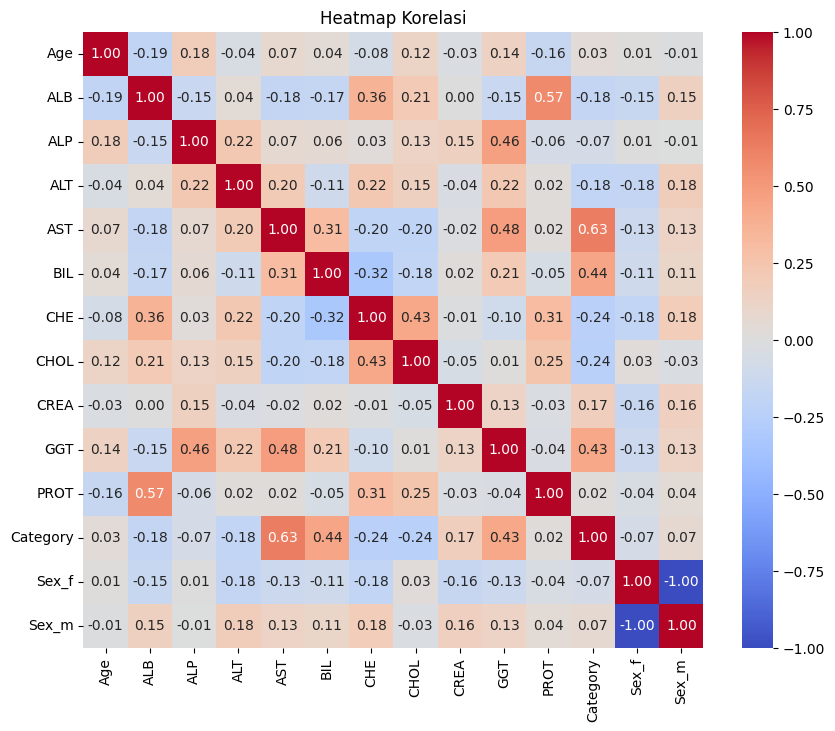

In [ ]:
correlation_matrix = df_final.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

In [ ]:
pd.value_counts(df_final['Category'])

0    533
1     56
Name: Category, dtype: int64

In [ ]:
# Temukan kelas minoritas
kelas_minoritas = df_final['Category'].value_counts().idxmin()

# Pisahkan kelas minoritas dan mayoritas
df_minoritas = df_final[df_final['Category'] == kelas_minoritas]
df_mayoritas = df_final[df_final['Category'] != kelas_minoritas]

# Hitung rasio kelas minoritas terhadap mayoritas
jumlah_minoritas = len(df_minoritas)
jumlah_mayoritas = len(df_mayoritas)
rasio = jumlah_mayoritas / jumlah_minoritas

# Oversampling kelas minoritas
df_minoritas_oversampled = df_minoritas.sample(frac=rasio, replace=True, random_state=42)

# Gabungkan kelas minoritas yang sudah di-oversampling dengan mayoritas
df_oversampled = pd.concat([df_mayoritas, df_minoritas_oversampled])
df = df_oversampled
pd.value_counts(df['Category'])

0    533
1    533
Name: Category, dtype: int64

* Melakukan Balancing data Oversampling

* Memilih semua kolom kecuali 'Category' untuk dijadikan features dan kolom 'Category' dijadikan label

* Membuat split data menjadi data train dan test 80:20 dengan random state 42

* Membuat model parameter untuk knn classifier

In [ ]:
X = df.drop('Category', axis=1)
y = df['Category']

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Jumlah data setelah pemisahan menjadi set pelatihan dan pengujian
print("Jumlah Data Set Train:")
print(y_train.value_counts())

print("\nJumlah Data Set Test:")
print(y_test.value_counts())

Jumlah Data Set Train:
1    433
0    419
Name: Category, dtype: int64

Jumlah Data Set Test:
0    114
1    100
Name: Category, dtype: int64


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model KNN
knn_model = KNeighborsClassifier()

# Definisi parameter KNN
model_parameters_knn = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'],
                       'p': [1, 2]}

# GridSearchCV untuk mencari parameter terbaik
gscv_KNN = GridSearchCV(estimator=knn_model,
                        param_grid=model_parameters_knn,
                        cv=5,
                        verbose=1,
                        n_jobs=-1,
                        scoring='roc_auc')

# Melatih model KNN dengan GridSearchCV
gscv_KNN.fit(X_train, y_train)

# Parameter terbaik
best_parameters_knn = gscv_KNN.best_params_
print("Parameter Terbaik untuk KNN:", best_parameters_knn)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Parameter Terbaik untuk KNN: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [ ]:
final_mod_KNN = KNeighborsClassifier(**gscv_KNN.best_params_)
final_mod_KNN.fit(X_train, y_train)

KNeighborsClassifier(p=1, weights='distance')

In [ ]:
train_pred = final_mod_KNN.predict(X_train)
test_pred = final_mod_KNN.predict(X_test)

In [ ]:
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       114
           1       0.98      1.00      0.99       100

    accuracy                           0.99       214
   macro avg       0.99      0.99      0.99       214
weighted avg       0.99      0.99      0.99       214



In [ ]:
y_pred = final_mod_KNN.predict(X_test)
predictions = [round(value) for value in y_pred]

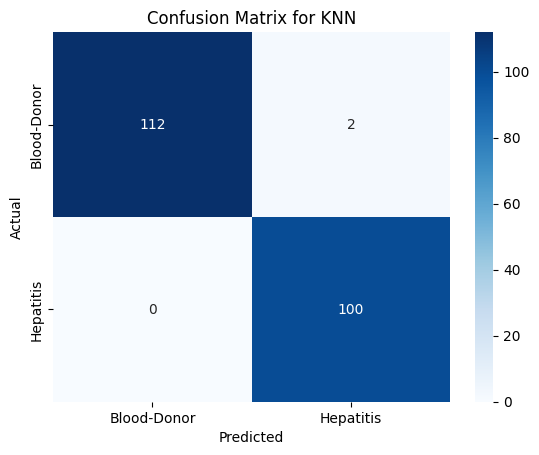

In [ ]:
conf_matrix_knn = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Blood-Donor', 'Hepatitis'],
            yticklabels=['Blood-Donor', 'Hepatitis'])

# Menambahkan label dan judul
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for KNN')

# Menampilkan plot
plt.show()

### h) Model Evaluation

In [ ]:
def plot_roc_auc_curve(y_train_actual, train_pred_prob, y_test_actual, test_pred_prob, *args):

    AUC_Train = roc_auc_score(y_train_actual, train_pred_prob)
    AUC_Test = roc_auc_score(y_test_actual, test_pred_prob)

    if len(args) == 0:
        print("Train AUC = ", AUC_Train)
        print("Test AUC = ", AUC_Test)
        fpr_train, tpr_train, thresholds = roc_curve(y_train_actual, train_pred_prob)
        fpr_test, tpr_test, thresholds = roc_curve(y_test_actual, test_pred_prob)
        roc_plot(fpr_train, tpr_train, fpr_test, tpr_test)

    else:
        AUC_Valid = roc_auc_score(args[0], args[1])
        print("Train AUC = ", AUC_Train)
        print("Test AUC = ", AUC_Test)
        print("Validation AUC = ", AUC_Valid)
        fpr_train, tpr_train, thresholds = roc_curve(y_train_actual, train_pred_prob)
        fpr_test, tpr_test, thresholds = roc_curve(y_test_actual, test_pred_prob)
        fpr_val, tpr_val, thresholds = roc_curve(args[0], args[1])
        roc_plot(fpr_train, tpr_train, fpr_test, tpr_test, fpr_val, tpr_val)

In [ ]:
def roc_plot(fpr_train, tpr_train, fpr_test, tpr_test, *args):


    fig = plt.plot(fpr_train, tpr_train, label = 'Train')
    fig = plt.plot(fpr_test, tpr_test, label = 'Test')

    if len(args) == 0:
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC curve using ")
        plt.xlabel("False Positive Rate (1 - Specificity)")
        plt.ylabel("True Positive Rate (Sensitivity)")
        plt.legend(loc = 'lower right')
        plt.grid(True)
        plt.show()

    else:
        fig = plt.plot(args[0], args[1], label = 'Validation')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC curve using ")
        plt.xlabel("False Positive Rate (1 - Specificity)")
        plt.ylabel("True Positive Rate (Sensitivity)")
        plt.legend(loc = 'lower right')
        plt.grid(True)
        plt.show()

Train AUC =  1.0
Test AUC =  1.0


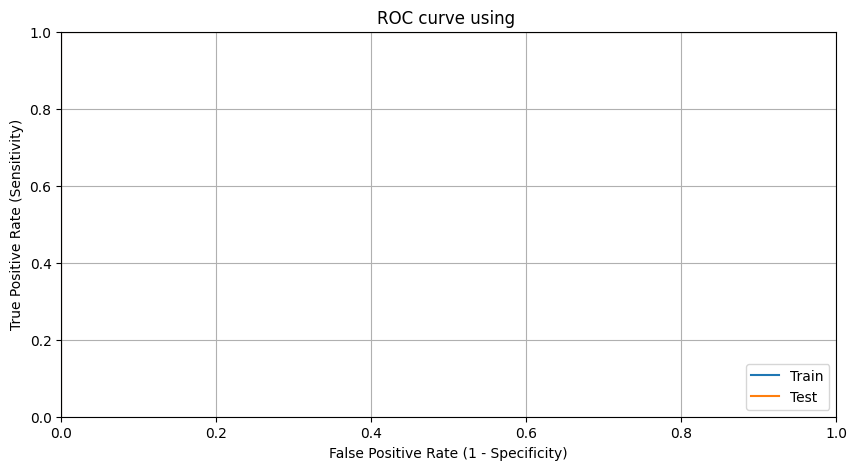

In [ ]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, roc_auc_score, recall_score, roc_curve
plt.subplots(figsize = (10, 5))
train_prob = final_mod_KNN.predict_proba(X_train)[:, 1]
test_prob = final_mod_KNN.predict_proba(X_test)[:, 1]

plot_roc_auc_curve(y_train, train_prob, y_test, test_prob)

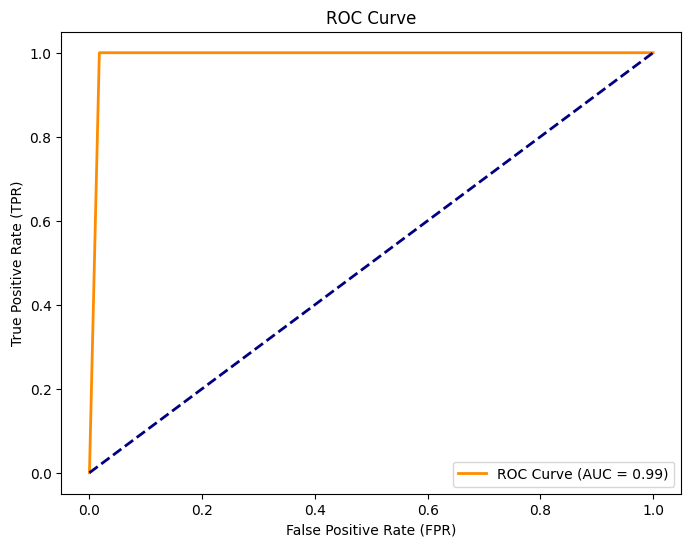

In [ ]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Menghitung AUC
roc_auc = auc(fpr, tpr)

# Membuat plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.07%
